<b>Data Source:

<b>Freelancer Earnings & Job Trends, Shohinur Pervez Shohan.

<b>Retrieved from https://www.kaggle.com/datasets/shohinurpervezshohan/freelancer-earnings-and-job-trends </b>

In this analysis, I applied a simple linear regression model to explore the relationship between a freelancer's job success rate and their total earnings in USD. The goal is to determine whether a higher job success rate can be used to predict or explain higher earnings on freelance platforms.

# Importing Library


In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
sns.set()


In [98]:
data = pd.read_csv('freelancer_earnings_bd(1).csv')
data.head()

,Freelancer_ID,Job_Category,Platform,Experience_Level,Client_Region,Payment_Method,Job_Completed,Earnings_USD,Hourly_Rate,Job_Success_Rate,Client_Rating,Job_Duration_Days,Project_Type,Rehire_Rate,Marketing_Spend
0,1,Web Development,Fiverr,Beginner,Asia,Mobile Banking,180,1620,95.79,68.73,3.18,1,Fixed,40.19,53
1,2,App Development,Fiverr,Beginner,Australia,Mobile Banking,218,9078,86.38,97.54,3.44,54,Fixed,36.53,486
2,3,Web Development,Fiverr,Beginner,UK,Crypto,27,3455,85.17,86.60,4.20,46,Hourly,74.05,489
3,4,Data Entry,PeoplePerHour,Intermediate,Asia,Bank Transfer,17,5577,14.37,79.93,4.47,41,Hourly,27.58,67
4,5,Digital Marketing,Upwork,Expert,Asia,Crypto,245,5898,99.37,57.80,5.00,41,Hourly,69.09,489


# Clean the data
### we only take two column that we need and make sure there's no error in the data
we'll use independent variable <b>Job Success Rate</b> to predict Dependen variable <b>Earning in USD</b>

In [100]:
data = data[['Earnings_USD','Job_Success_Rate']]
data

,Earnings_USD,Job_Success_Rate
0,1620,68.73
1,9078,97.54
2,3455,86.60
3,5577,79.93
4,5898,57.80
...,...,...
1945,6823,75.86
1946,7942,72.01
1947,9838,57.37
1948,4492,66.41


In [102]:
data['Earnings_USD'].apply(lambda x: pd.to_numeric(x, errors='coerce')).notnull().all()
data['Job_Success_Rate'].apply(lambda x: pd.to_numeric(x, errors='coerce')).notnull().all()


True

# Exploring the data

In [104]:
data.describe()

,Earnings_USD,Job_Success_Rate
count,1950.000000,1950.000000
mean,5017.566667,74.951846
std,2926.279918,14.615735
min,51.000000,50.160000
25%,2419.000000,61.917500
50%,5048.000000,75.400000
75%,7608.250000,87.537500
max,9991.000000,99.990000


<li>The mean earning is <b>5.018</b> dollars (rounding) </li>
<li>with smallest earning <b>51</b> dollars and highest <b>9.991</b> dollars</li>
<li>The mean job success rate is <b>75%</b> (rounding) from 100%</li>


## Scatter plot

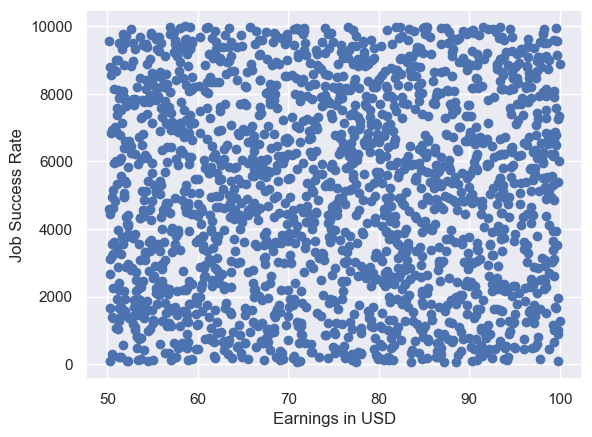

In [106]:
y = data['Earnings_USD']
x1 = data['Job_Success_Rate']
plt.scatter(x1,y)
plt.xlabel('Earnings in USD')
plt.ylabel('Job Success Rate')
plt.show()

<b>There's Weak or no correlation in the data, the reason:
1. The data points are scattered randomly.
2. There’s no visible trend upward or downward.
3. This likely means that job success rate doesn’t strongly influence earnings, at least not directly.

Let's explore the number to confirm

## The correlation

In [125]:
data[['Job_Success_Rate', 'Earnings_USD']].corr()


,Job_Success_Rate,Earnings_USD
Job_Success_Rate,1.000000,0.029551
Earnings_USD,0.029551,1.000000


## The Regression 

In [108]:
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Earnings_USD   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.703
Date:                Tue, 15 Apr 2025   Prob (F-statistic):              0.192
Time:                        22:35:32   Log-Likelihood:                -18329.
No. Observations:                1950   AIC:                         3.666e+04
Df Residuals:                    1948   BIC:                         3.667e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             4574.1142    346.253     13.210      0.000    3895.049    5253.179
Job_Success_Rate     5.9165      4.534      1.305      0.192      -2.976      14.809
==============================================================================
Omnibus:                     1650.358   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              118.253
Skew:                          -0.008   Prob(JB):                     2.10e-26
Kurtosis:                       1.794   Cond. No.                         399.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

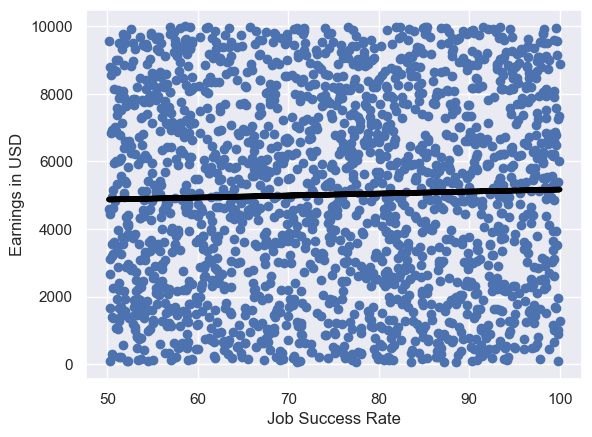

In [133]:
plt.scatter(x1,y)
yhat =  5.9165 * x1 + 4574.1142 	
fig = plt.plot(x1,yhat,lw=4, c='black', label ='Regression Line')
plt.xlabel('Job Success Rate')
plt.ylabel('Earnings in USD')
plt.show()

# Conclusion


### key findings:

* <b>The correlation:</b> At first glance, the two variables may appear to have some relationship, but the correlation coefficient of only 0.03 reveals that there is no meaningful linear relationship between Job Success Rate and Earnings USD.

* <b>Standard error is large:</b> The standard error of the coefficient is relatively high, which suggests low accuracy and high uncertainty in the prediction.

* <b>P-value (0.192) > 0.05:</b> The p-value for Job Success Rate is greater than the commonly used threshold of 0.05, indicating that it is not a statistically significant predictor of earnings.

* <b>R-squared (0.001) is very low:</b> The model explains only 0.1% of the variation in Earnings USD, confirming that Job Success Rate does not effectively predict freelancer earnings.

* <b>Coefficient = 5.91:</b> For every 1% increase in job success rate, earnings increase by just $5.91 — a very small and unreliable effect, given its lack of significance.

* <b>Intercept (const) = 4574.11:</b> This represents the predicted earnings when job success rate is 0%, which is likely not realistic, but is required for the regression formula.

* <b>Conclusion:</b> Given the weak correlation, low R-squared, high p-value, and imprecise coefficient, no strong or reliable prediction of freelancer earnings can be made based on job success rate alone in this dataset.